Goal - The machine learning model is supposed to predict who survived during the titanic shipwreck.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#load data
titanic_data = pd.read_csv('/content/titanic_dataset .csv')

In [ ]:
df = titanic_data

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 There are total 891 rows, Age shows only 714 (means missing), Embarked (2 missing) and Cabin missing a lot as well. Object data types are non-numeric so we have to find a way to encode them to numerical values

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are null values in Age, Cabin and Embarked columns

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#data type of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since there 687 null values in Cabin We can just drop the Cabin column as such.


*   Survived is the target variable.

*   PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
'Age' and 'Embarked' has less number of

*   'Age' and 'Embarked' has less number of missing value. We have to impute them using different techniques.
*   As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.






Dropping Columns which are not useful

In [ ]:
cols = ['PassengerId','Name', 'Ticket', 'Cabin']
df = df.drop(cols,axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in ['Sex', 'Embarked']:
  df[i] = encoder.fit_transform(df[i])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.246689
dtype: float64

In [ ]:
#since Embarked is a categorical value we replace null values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())


In [ ]:
#Since the Age has a skewed distribution We replace null values with median
df['Age'] = df['Age'].fillna(df['Age'].median())


In [ ]:
#Checking whether all the missing values are handled
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Outlier Handling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
#we take only number columns while outlier handling
num_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

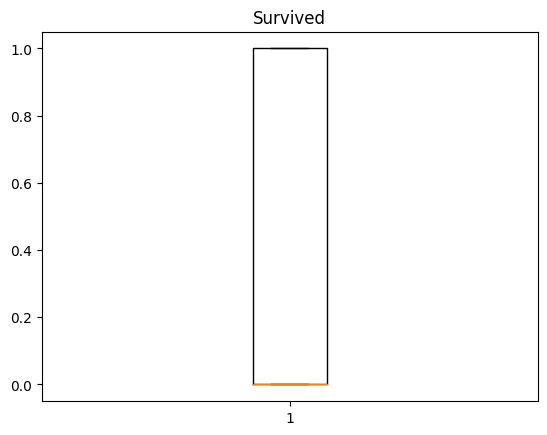

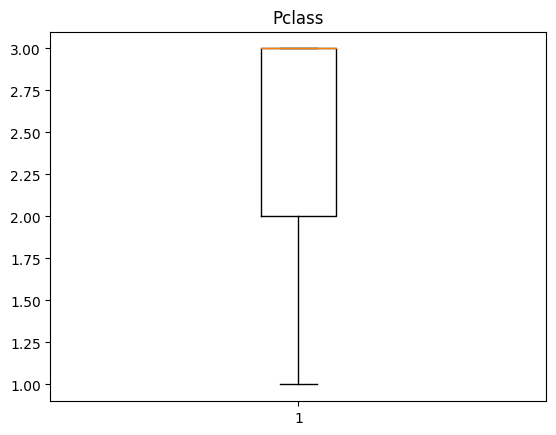

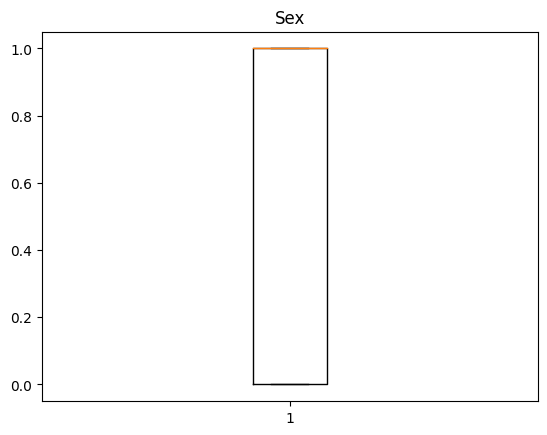

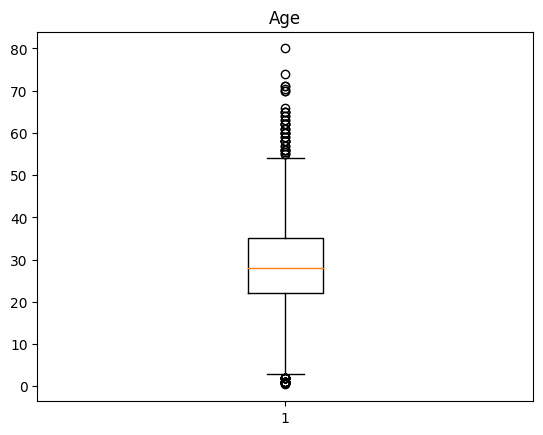

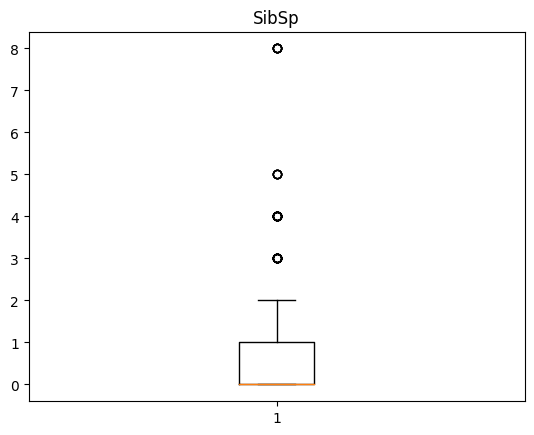

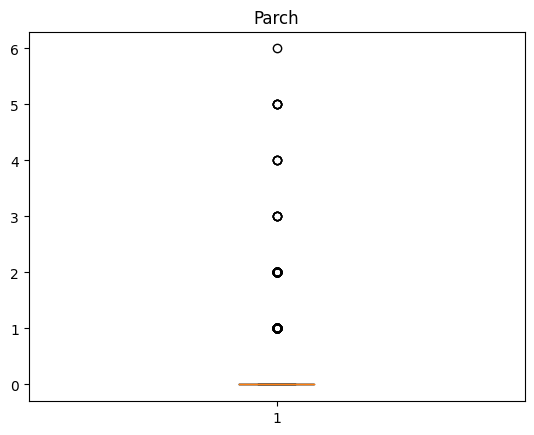

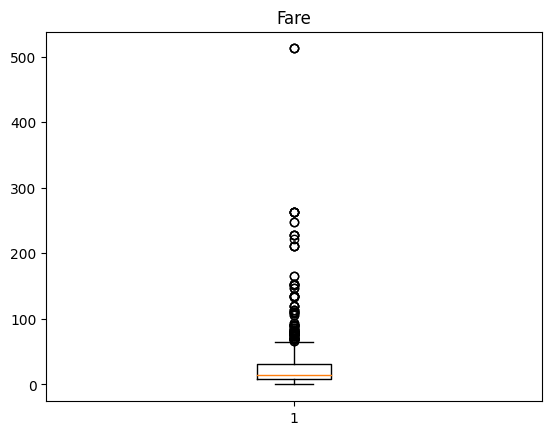

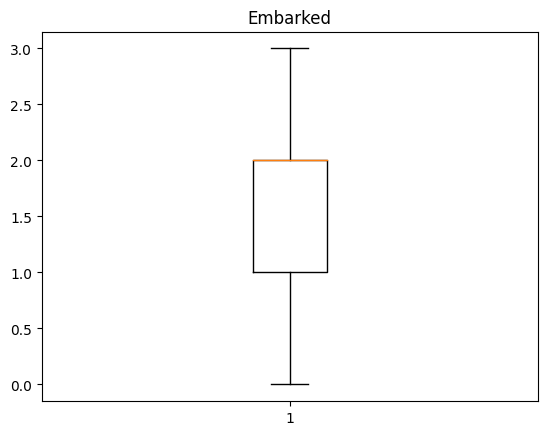

In [ ]:
for i in num_columns:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i);

In [ ]:
#There are so many outliers in Age and Fare. so we handle outliers in Age and Fare only
#Outlier handling in Age

In [ ]:
#Using IQR to remove the outliers
Q1 = np.percentile(df['Age'],25,method='midpoint')
Q2 = np.percentile(df['Age'],50,method='midpoint')
Q3 = np.percentile(df['Age'],75,method='midpoint')

In [ ]:
print('Q1 is :',Q1)
print('Q2 is :',Q2)
print('Q3 is :',Q3)

Q1 is : 22.0
Q2 is : 28.0
Q3 is : 35.0


In [ ]:
IQR = Q3 - Q1
print(IQR)

13.0


In [ ]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 +1.5*IQR

print("lower value: ",low_lim)
print("Upper value: ",up_lim)


lower value:  2.5
Upper value:  54.5


In [ ]:
df1 = df

In [ ]:
outliers = []

for x in df1['Age']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)

print(outliers)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [ ]:
df1['Age'] = df1['Age'].clip(lower = low_lim,upper = up_lim)

In [ ]:
outliers = []

for x in df1['Age']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)

print(outliers)

[]


In [ ]:
#Outlier Handling of Fare column
#Using IQR to remove the outliers
Q1 = np.percentile(df1['Fare'],25,method='midpoint')
Q2 = np.percentile(df1['Fare'],50,method='midpoint')
Q3 = np.percentile(df1['Fare'],75,method='midpoint')

In [ ]:
print('Q1 is :',Q1)
print('Q2 is :',Q2)
print('Q3 is :',Q3)

Q1 is : 7.9104
Q2 is : 14.4542
Q3 is : 31.0


In [ ]:
IQR = Q3 - Q1
print(IQR)

23.0896


In [ ]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 +1.5*IQR

print("lower value: ",low_lim)
print("Upper value: ",up_lim)


lower value:  -26.724
Upper value:  65.6344


In [ ]:
df2 = df1

In [ ]:
outliers = []

for x in df2['Fare']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)

print(outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [ ]:
df2['Fare'] = df2['Fare'].clip(lower = low_lim,upper = up_lim)

In [ ]:
#Checking whether all the outliers are handled
outliers = []

for x in df2['Fare']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)

print(outliers)

[]


In [ ]:
#Thus Outliers are Handled

<Axes: >

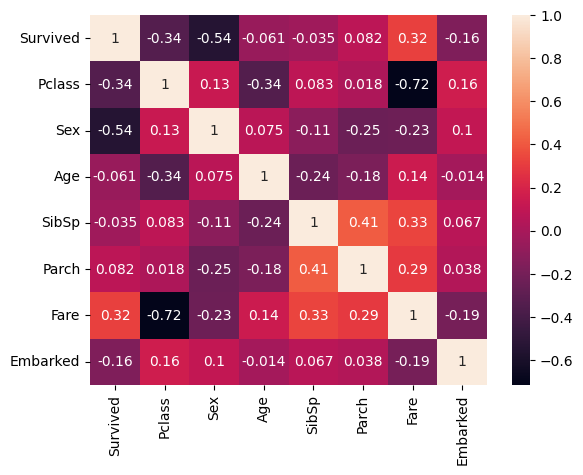

In [ ]:
#lets do correlation
sns.heatmap(df2.corr(),annot = True)

There is no significant correlation between any of the columns

In [ ]:
# x = dependent variable
X = df.drop('Survived',axis = 1)
y = df['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,65.6344,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [ ]:
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Dividing data set into training set and test set

In [ ]:
#split the dataset for 70% Training and 30% test set using scikit model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#linear model to regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter = 1000)

In [ ]:
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

In [ ]:
log_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
confusion_matrix(y_test,log_pred)

array([[137,  20],
       [ 31,  80]])

In [ ]:
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred))
print('recall:',recall_score(y_test,log_pred))
print('F1:',f1_score(y_test,log_pred))

Accuracy: 0.8097014925373134
Precision: 0.8
recall: 0.7207207207207207
F1: 0.7582938388625592


In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
Scaled_xtrain = scaler.fit_transform(X_train)
Scaled_xtest = scaler.fit_transform(X_test)

In [ ]:
log_reg.fit(Scaled_xtrain,y_train)
log_pred=log_reg.predict(Scaled_xtest)

In [ ]:
confusion_matrix(y_test,log_pred)

array([[139,  18],
       [ 32,  79]])

In [ ]:
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred))
print('recall:',recall_score(y_test,log_pred))
print('F1:',f1_score(y_test,log_pred))

Accuracy: 0.8134328358208955
Precision: 0.8144329896907216
recall: 0.7117117117117117
F1: 0.7596153846153846


kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [ ]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  knn_pred=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'Metric K')

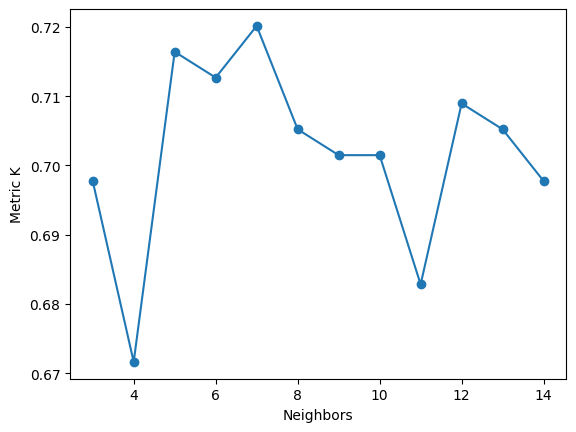

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Metric K')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test,knn_pred)

array([[130,  27],
       [ 49,  62]])

In [ ]:
print("Accuracy: ", accuracy_score(y_test,knn_pred))
print('Precision: ', precision_score(y_test,knn_pred))
print('recall: ', recall_score(y_test,knn_pred))
print('F1: ', f1_score(y_test,knn_pred))

Accuracy:  0.7164179104477612
Precision:  0.6966292134831461
recall:  0.5585585585585585
F1:  0.62


In [ ]:
#logistic regression with scaling is better.since better accuracy
classifier.fit(Scaled_xtrain,y_train)
knn_pred=classifier.predict(Scaled_xtest)
confusion_matrix(y_test,knn_pred)
print('Accuracy: ',accuracy_score(y_test,knn_pred))
print('Precision: ',precision_score(y_test,knn_pred))
print('recall: ',recall_score(y_test,knn_pred))
print('f1: ',f1_score(y_test,knn_pred))

Accuracy:  0.7798507462686567
Precision:  0.782608695652174
recall:  0.6486486486486487
f1:  0.7093596059113302


SVM

In [ ]:
from sklearn.svm import SVC
sv_clf = SVC(kernel = 'linear')
sv_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = sv_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy score is : ', accuracy_score(y_test,y_pred))

Accuracy score is :  0.7910447761194029


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[134  23]
 [ 33  78]]


K-fold

In [ ]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)


In [ ]:
#no need to do this step while doing program
for train_index,test_index in kfold_validator.split(X,y):
  print('Training index: ',train_index)
  print('Testing Index: ',test_index)

Training index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [ ]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(log_reg,X,y,cv=kfold_validator)

In [ ]:
cv_result

array([0.77777778, 0.82022472, 0.7752809 , 0.79775281, 0.76404494,
       0.76404494, 0.76404494, 0.7752809 , 0.82022472, 0.83146067])

In [ ]:
cv_result.mean()

0.7890137328339575

Stratified Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
strat_validator = StratifiedKFold(n_splits = 10)

In [ ]:
for train_index,test_index in strat_validator.split(X,y):
  print('Training index: ',train_index)
  print('Testing Index: ',test_index)

Training index:  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [ ]:
skr_cv_result = cross_val_score(log_reg,X,y,cv=strat_validator)
skr_cv_result

array([0.78888889, 0.79775281, 0.75280899, 0.80898876, 0.7752809 ,
       0.76404494, 0.7752809 , 0.78651685, 0.78651685, 0.83146067])

In [ ]:
skr_cv_result.mean()

0.7867540574282146